
Combination
======================

### A folded domain featuring an unconformity and a fault. We start by importing


In [8]:
import sys, os

In [9]:
#Run this cell only if you want to run gempy in cuda mode (requires cuda and a dedicated cpu).
#Initial compilation will take a bit longer but the model will run much faster 
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda"

In [10]:
# The necessary dependencies:
# Importing GemPy
import gempy as gp
import pandas as pd

### Creating the model by importing the input data and displaying it:


In [11]:
# %%
from sandbox import _test_data
path_to_data = _test_data.get('gempy_example_data')

geo_data = gp.create_data('combination',
                          extent=[0, 2500, 0, 1000, 100, 1200],
                          resolution=[50, 50, 50],
                          path_o=path_to_data + "model7_orientations.csv",
                          path_i=path_to_data + "model7_surface_points.csv")

# %%
geo_data.get_data()

Active grids: ['regular']


X     Y    Z    smooth surface       G_x           G_y  \
surface_points 0     0     0  800  0.000002   rock3       NaN           NaN   
               1     0   500  800  0.000002   rock3       NaN           NaN   
               2     0  1000  800  0.000002   rock3       NaN           NaN   
               3   500     0  800  0.000002   rock3       NaN           NaN   
               4   500   500  800  0.000002   rock3       NaN           NaN   
...                ...   ...  ...       ...     ...       ...           ...   
orientations   4     0  1000  450  0.010000   rock2 -0.422618  9.999741e-13   
               1     0   500  250  0.010000   rock1 -0.422618  9.999741e-13   
               3     0     0  250  0.010000   rock1 -0.422618  9.999741e-13   
               5     0  1000  250  0.010000   rock1 -0.422618  9.999741e-13   
               7  2000   500  400  0.010000   fault  0.819152  1.000050e-12   

                       G_z  
surface_points 0       NaN  
               1       NaN  
               2       NaN  
               3       NaN  
               4       NaN  
...                    ...  
orientations   4  0.906308  
               1  0.906308  
               3  0.906308  
               5  0.906308  
               7  0.573576  

[110 rows x 8 columns]

Fault colors changed. If you do not like this behavior, set change_color to False.


/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


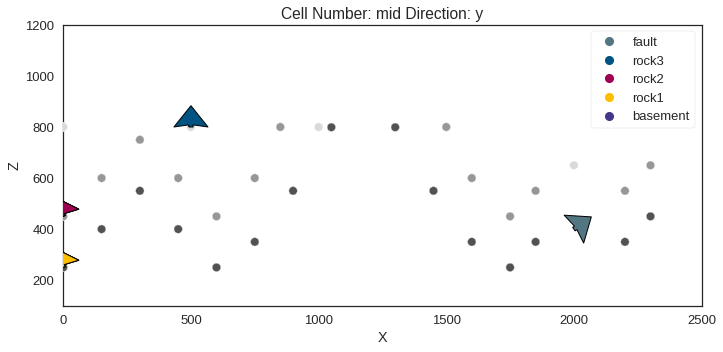

In [12]:
# Setting and ordering the units and series:
gp.map_stack_to_surfaces(geo_data, {"Fault_Series": ('fault'), "Strat_Series1": ('rock3'),
                                     "Strat_Series2": ('rock2','rock1'),
                                     "Basement_Series":('basement')})

geo_data.set_is_fault(['Fault_Series'])

# Plot Data
gp.plot_2d(geo_data, direction='y')

### Calculating the model:


In [14]:
interp_data = gp.set_interpolator(geo_data, theano_optimizer='fast_run')

sol = gp.compute_model(geo_data)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cuda
Precision:  float32
Number of faults:  1
Compilation Done!
Kriging values: 
                         values
range              2908.607914
$C_o$            201428.571429
drift equations   [3, 3, 3, 3]


In [15]:
%%timeit
sol = gp.compute_model(geo_data)

1.83 s ± 138 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Displaying the result:
<div class="alert alert-warning">

**Warning:** The sandbox thread is faster when smaller resolution is used, but the cross-sections can look ugly or not understandable at all

</div>



/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


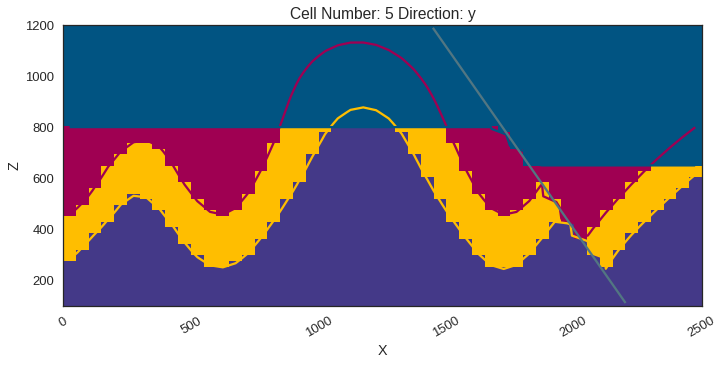

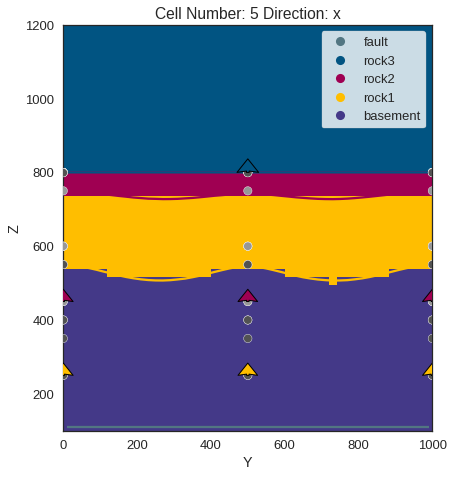

In [16]:
 #x direction:
gp.plot_2d(geo_data, cell_number=5,
           direction='y', show_data=False, show_boundaries=True)

# y direction:
gp.plot_2d(geo_data, cell_number=5,
           direction='x', show_data=True)

/home/daniel/anaconda3/envs/sandbox-env/lib/python3.7/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


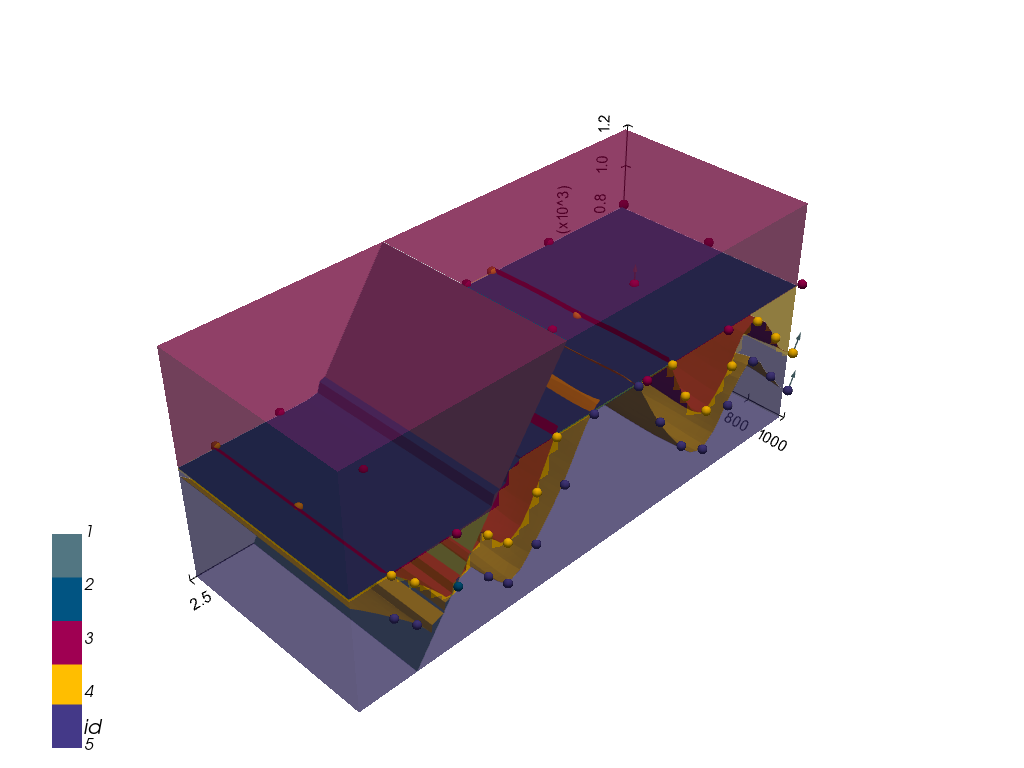

In [17]:
# 3d view
gp.plot_3d(geo_data, image=False, show_topography=True, plotter_type='basic', notebook=True, show_lith=True)

## Initialize Sensor and Projector

In [18]:
#save the paths to the calibration files 
from sandbox import _calibration_dir
_calibprojector = _calibration_dir + "my_projector_calibration.json"
_calibsensor = _calibration_dir + "my_sensor_calibration.json"

In [19]:
#Import Sensor
from sandbox.sensor import Sensor
sensor = Sensor(calibsensor=_calibsensor, name="kinect_v2")

sandbox.sensor.sensor_api: INFO | JSON configuration loaded for sensor.
sandbox.sensor.dummy: INFO | DummySensor initialized.


In [20]:
# Import projector
from sandbox.projector import Projector
projector = Projector(calibprojector=_calibprojector)

sandbox.projector.projector: INFO | JSON configuration loaded for projector


Launching server at http://localhost:46507
sandbox.projector.projector: INFO | Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


In [21]:
#Initialize the aruco detection
from sandbox.markers import MarkerDetection
aruco = MarkerDetection(sensor=sensor)

sandbox.markers.aruco: INFO | Using dummy arucos. Create your own aruco positions using .set_aruco_position() function
sandbox.markers.aruco: INFO | using dummy aruco module
sandbox.markers.aruco: INFO | Aruco module loaded
sandbox.markers.markers_plotting: INFO | Aruco detection ready


In [22]:
from sandbox.main_thread import MainThread
main = MainThread(sensor=sensor, projector=projector, aruco=aruco)

sandbox.projector.contourlines: INFO | ContourLinesModule loaded successfully
sandbox.projector.shading: INFO | LightSource set to address RWTH Aachen, Germany at datetime Mon Dec 13 21:19:56 2021
sandbox.projector.cmap: INFO | CmapModule loaded successfully


In [23]:
# Start the thread 
main.run()

sandbox.main_thread: INFO | Thread started or resumed...


In [24]:
main.widget_plot_module()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Column
                [0] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Show colormap', value=True)
                    [2] Select(name='Choose a colormap', options=['gist_earth', ...], value='gist_earth')
                    [3] Column
                        [0] Markdown(str)
                        [1] Checkbox(name='Show relief shading', value=True)
                        [2] Tabs
                            [0] WidgetBox
                                [0] Checkbox(name='Manual configuration')
                                [1] FloatSlider(end=360.0, name='Azimuth', value=305.37944922724455)
                                [2] FloatSlider(end=90.0, name='Altitude', value=-52.66772309081588)
                                [3] FloatInput(name='Vertical Exageration', step=0.01, value=0.25)
                            [1] WidgetBox
                                [0] TextInput(name='Enter address (e.g. City,..., value='RWTH Aachen, Germany')
                                [1] DatePicker(name='Select date (UTC +0)', value=datetime.date(2021, ...)
                                [2] Row(width_policy='min')
                                    [0] IntSlider(end=23, name='Hour', value=21, width_policy='min')
                                    [1] IntSlider(end=59, name='Minute', value=19, width_policy='min')
                                    [2] IntSlider(end=59, name='Second', value=56, width_policy='min')
                                [3] Markdown(str, sizing_mode='scale_width')
                                [4] Markdown(str, sizing_mode='scale_width')
                                [5] Markdown(str, sizing_mode='scale_width')
                                [6] Markdown(str, sizing_mode='scale_width')
                            [2] WidgetBox
                                [0] Checkbox(name='Start day simulation i...)
                [1] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Active contours', value=True)
                    [2] Checkbox(name='Automatic levels f...)
                    [3] Markdown(str)
                    [4] WidgetBox
                        [0] Checkbox(name='Show major contours', value=True)
                        [1] IntInput(name='Choose a contour step', value=100)
                        [2] Checkbox(name='Show minor contours', value=True)
                        [3] IntInput(name='Choose a minor c..., value=50)
                        [4] Checkbox(name='Show contours label', value=True)
                        [5] IntInput(name='set a contour l..., value=15)
            [1] Column
                [0] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Aruco Detection', value=True)
                    [2] Column
                        [0] Markdown(str)
                        [1] Row
                            [0] WidgetBox
                                [0] Checkbox(name='Show aruco location', value=True)
                                [1] Checkbox(name='Show aruco id', value=True)
                                [2] Checkbox(name='Show line connecting a...)
                                [3] ColorPicker(name='Color', value='#ff0000')
                            [1] WidgetBox
                                [0] Markdown(str)
                                [1] Row
                                    [0] IntInput(name='id', value=1, width=70)
                                    [1] IntInput(name='x coordinate', value=50, width=70)
                                    [2] IntInput(name='y coordinate', value=50, width=70)
                                [2] Button(button_type='success', name='Add dummy aruco dict')
                                [3] Button(button_type='warning', name='Clear aruco dict')
                [1] Column
                    [0] Markdown(str)
                    [1] RadioB

## Initialize the gempy module 

In [25]:
main.stop()
from sandbox.modules.gempy import GemPyModule
gpsb= GemPyModule(geo_model = geo_data, 
                  extent = sensor.extent, 
                  box=sensor.physical_dimensions, 
                  load_examples = False,
                 )

scale in Model units/ mm (X,Y,Z): [2.5, 1.25, 3.4375]
the shown extent is [0.0, 2500.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections']
sandbox.modules.gempy.gempy_module: INFO | GemPyModule loaded successfully


In [26]:
main.add_module(name='gempy', module=gpsb)
main.run()

sandbox.main_thread: INFO | module gempy added to modules


In [32]:
#Turn on Hill Shading
gpsb.show_hillshades = True
gpsb.show_lith = True
gpsb.show_boundary = True
gpsb.show_contour = False
gpsb.show_only_faults = False
gpsb.show_fill_contour = True


In [33]:




main.stop()

sandbox.main_thread: INFO | Thread stopped.
